# Cifar10 上的 ReNet18

本文主要介绍在 cifar10 的试验 resnet18 的性能。

导入一些必要包：

In [1]:
import logging
import torch
from torch import nn
from torch.profiler import profile, record_function, ProfilerActivity
from torch_book.vision.classifier import Classifier, evaluate_accuracy
from torch_book.datasets.cifar10 import Cifar10
torch.cuda.empty_cache() # 清空 GPU 缓存


logging.basicConfig(filename='logs/debug-graph.log',
                    filemode="w",
                    format='%(asctime)s|%(levelname)s|%(name)s->%(funcName)s@%(message)s',
                    level=logging.INFO)

In [2]:
from resnet18 import get_model

In [3]:
model = get_model()

加载数据集：

In [4]:
data = Cifar10(batch_size = 128, num_workers=8, cutout=None)
train_iter = data.train_loader()
test_iter = data.val_loader()

Files already downloaded and verified
Files already downloaded and verified


做一些准备工作：

In [5]:
classifier = Classifier(model, train_iter, test_iter, device=torch.device("cuda:0"))
classifier.prepare_optimizer(lr=0.0142857, momentum=0.857142,
                             weight_decay=0.000857142)
classifier.prepare_scheduler(lr_period=2, lr_decay=0.857142)

训练模型：

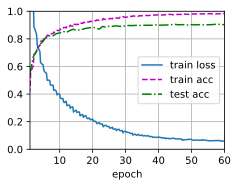

In [6]:
torch._dynamo.reset()
num_epochs = 60
classifier.prepare_animator(num_epochs)
classifier.fit(num_epochs)

In [7]:
test_acc = evaluate_accuracy(classifier.mod, classifier.test_iter, device=torch.device("cuda:0"))
test_acc

0.903

保存模型（也可以直接 {download}`下载训练权重 <https://github.com/xinetzone/torch-book/releases/download/resnet18_cifar10_relu/resnet18_cifar10_relu.h5>`）：

In [8]:
torch.save(classifier.mod.state_dict(),
           'params/resnet18_cifar10_silu.h5')

## Cutout Cifar10 训练

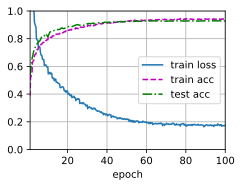

In [3]:
import logging
import torch
from torch import nn
from torch_book.vision.classifier import Classifier, evaluate_accuracy
from torch_book.datasets.cifar10 import Cifar10
torch.cuda.empty_cache() # 清空 GPU 缓存
from torch_book.transforms.cutout import Cutout
from resnet18 import get_model

logging.basicConfig(filename='logs/debug-graph.log',
                    filemode="a",
                    format='%(asctime)s|%(levelname)s|%(name)s->%(funcName)s@%(message)s',
                    level=logging.INFO)

num_epochs = 100
model = get_model()
data = Cifar10(batch_size = 64, cutout=Cutout(1, 16), num_workers=8)
train_iter = data.train_loader()
test_iter = data.val_loader()
classifier = Classifier(model, train_iter, test_iter, device=torch.device("cuda:0"))
classifier.prepare_optimizer(lr=0.0142857, momentum=0.857142,
                             weight_decay=0.000857142)
classifier.prepare_scheduler(lr_period=2, lr_decay=0.857142)
classifier.prepare_animator(num_epochs)
classifier.fit(num_epochs)

In [4]:
test_acc = evaluate_accuracy(classifier.mod, classifier.test_iter, device=torch.device("cuda:0"))
test_acc

0.9282

In [6]:
torch.save(classifier.mod.state_dict(),
           'params/resnet18_cifar10_silu_cutout.h5')